In [4]:
from pyhive import hive
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [5]:
conn = hive.Connection(host = 'hadoop.rcc.uchicago.edu', 
                       port = 10000, 
                       username = 'mtoolsidas', 
                       database = 'dmp_yelp_rs')

cursor = conn.cursor()

query = 'select * from review limit 2000000'
cursor.execute(query)
res = cursor.fetchall()
df = pd.DataFrame(res, columns = [i[0].split('.')[1] for i in cursor.description])

In [6]:
df.date.iloc[0]

'2014-10-11 03:34:02'

In [7]:
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d %H:%M:%S')

In [8]:
df['hour'] = df['date'].dt.hour
df['just_date'] = df['date'].dt.date
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['month_year'] = df['date'].dt.to_period('M').astype(str)
df['month_year'] = pd.to_datetime(df['month_year'], format = '%Y-%m')

In [9]:
hourly_df = df.groupby('hour')['hour'].count()
daily_df = df.groupby('just_date')['just_date'].count()
hourly_df = df.groupby('hour')['hour'].count()
monthly_df = df.groupby('month')['month'].count()
yearly_df = df.groupby('year')['year'].count()
monthly_yearly_df = df.groupby('month_year')['month_year'].count()

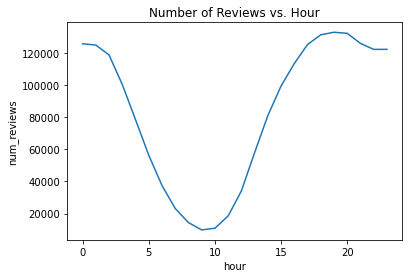

In [10]:
plt.plot(hourly_df)
plt.xlabel('hour')
plt.ylabel('num_reviews')
plt.title('Number of Reviews vs. Hour')
plt.show()

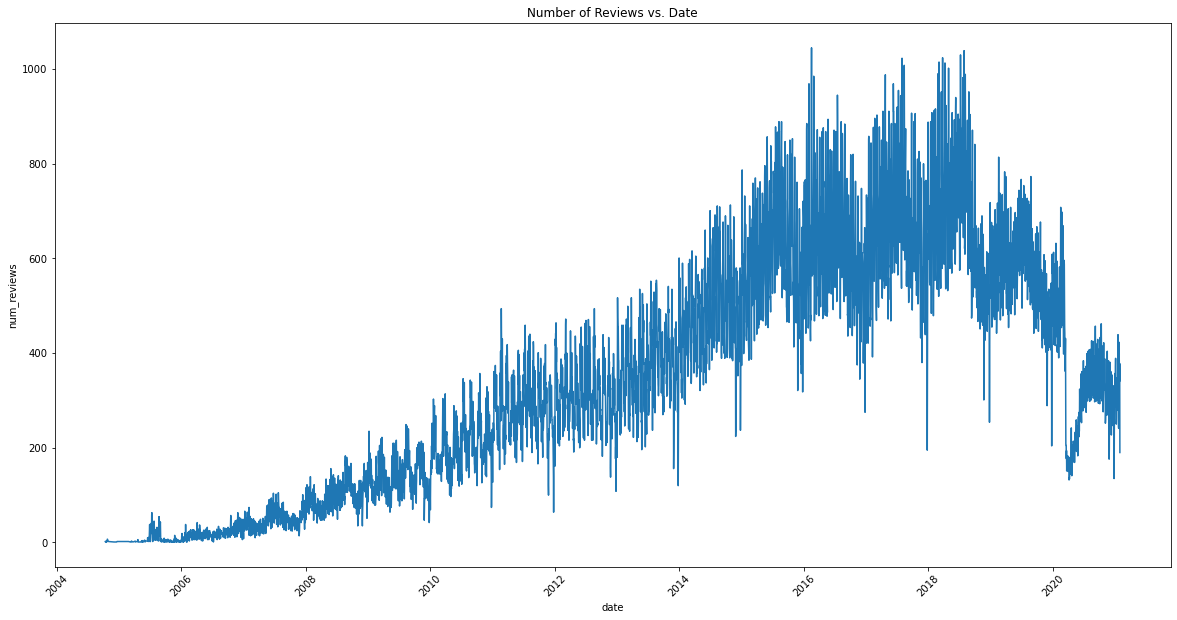

In [11]:
plt.rcParams["figure.figsize"]=(20,10)

plt.plot(daily_df)#.loc[datetime.date(year=2018,month=3,day=1):datetime.date(year=2018,month=3,day=31)])
plt.xlabel('date')
plt.xticks(rotation = 45)
plt.ylabel('num_reviews')
plt.title('Number of Reviews vs. Date')
plt.show()

In [12]:
# plt.rcParams["figure.figsize"]=(20,10)

# daily_all = pd.read_csv('daily_reviews.csv')
# daily_all = daily_all.rename(columns = {'_c0':'date', '_c1':'num_reviews'}).set_index('date')

# plt.plot(daily_all)
# plt.xlabel('date')
# plt.xticks(rotation = 45)
# plt.ylabel('num_reviews')
# plt.title('Number of Reviews vs. Date (ALL)')
# plt.show()

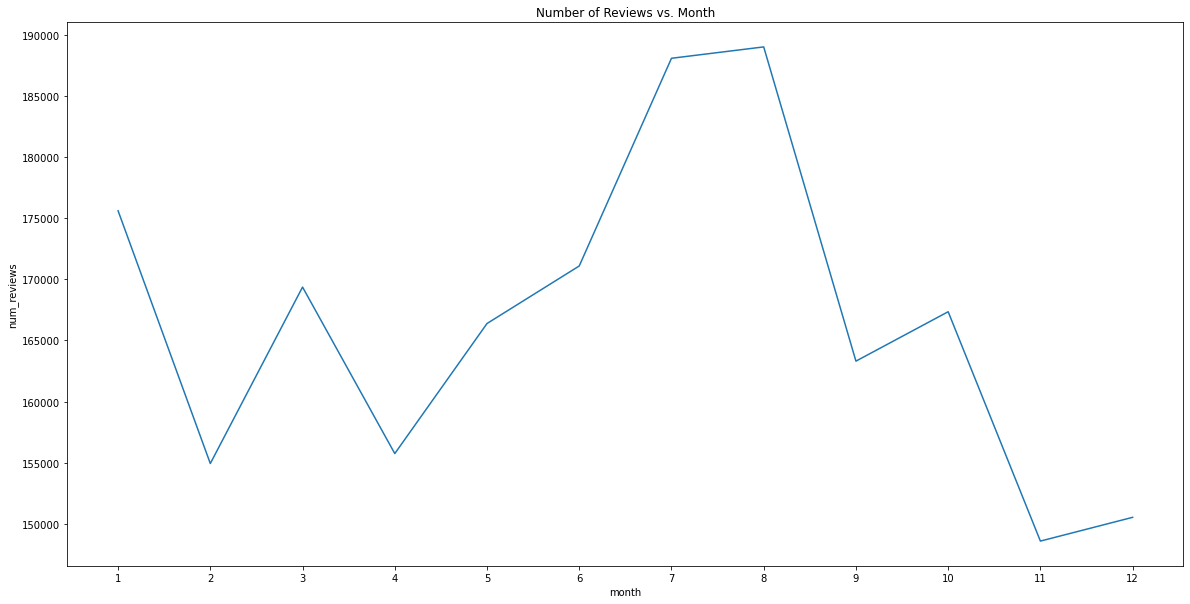

In [13]:
plt.plot(monthly_df)
plt.xlabel('month')
plt.xticks(monthly_df.index)
plt.ylabel('num_reviews')
plt.title('Number of Reviews vs. Month')
plt.show()

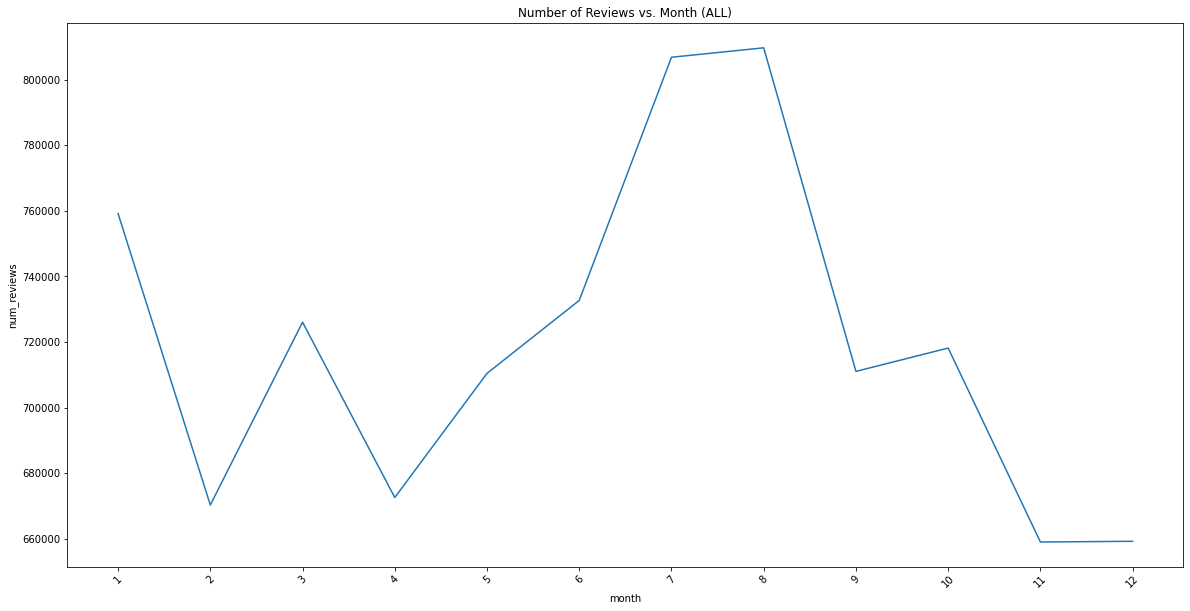

In [14]:
plt.rcParams["figure.figsize"]=(20,10)

monthly_all = pd.read_csv('monthly_reviews.csv')
monthly_all = monthly_all.rename(columns = {'_c0':'month', '_c1':'num_reviews'}).set_index('month')

plt.plot(monthly_all)
plt.xlabel('month')
plt.xticks(monthly_all.index, rotation = 45)
plt.ylabel('num_reviews')
plt.title('Number of Reviews vs. Month (ALL)')
plt.show()

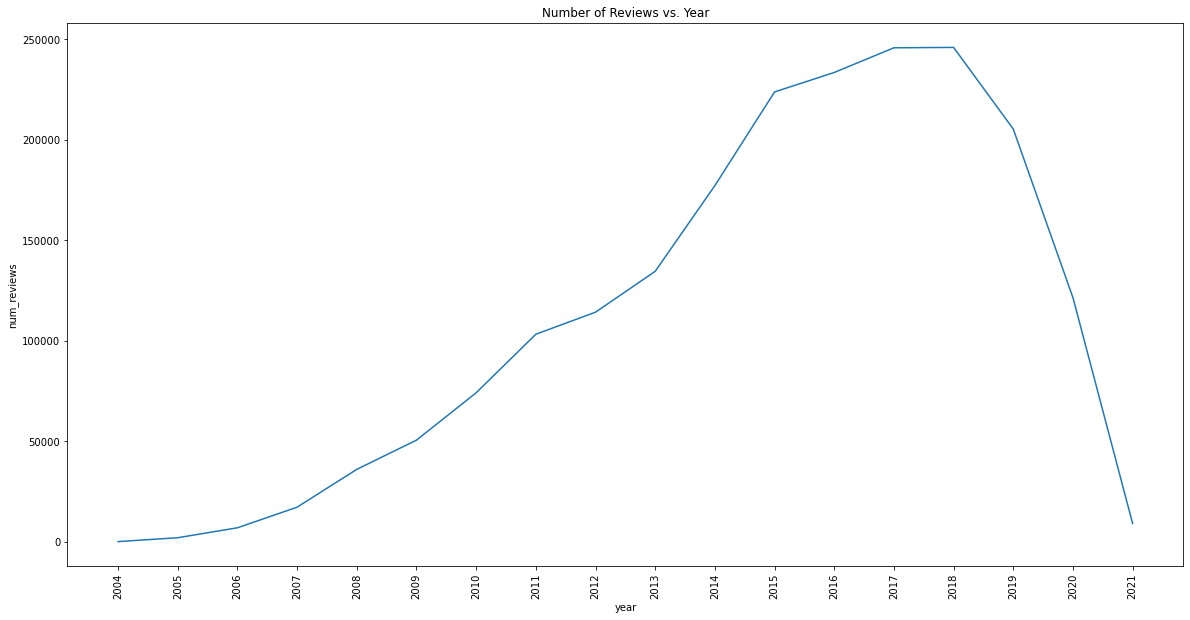

In [15]:
plt.plot(yearly_df)
plt.xlabel('year')
plt.xticks(yearly_df.index, rotation = 90)
plt.ylabel('num_reviews')
plt.title('Number of Reviews vs. Year')
plt.show()

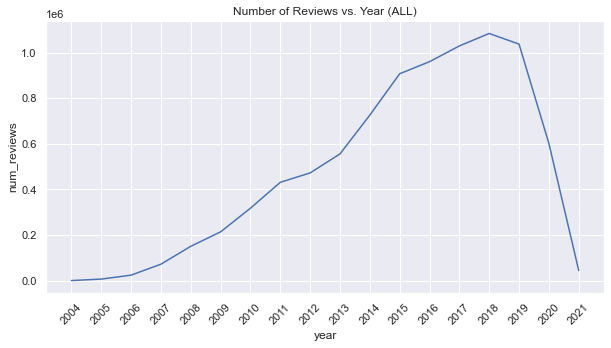

In [93]:
plt.rcParams["figure.figsize"]=(10,5)

yearly_all = pd.read_csv('yearly_reviews.csv')
yearly_all = yearly_all.rename(columns = {'_c0':'year', '_c1':'num_reviews'}).set_index('year')
yearly_all.index = yearly_all.index.astype(str)
yearly_all = yearly_all.sort_index()

plt.plot(yearly_all)
plt.xlabel('year')
plt.xticks(yearly_all.index, rotation = 45)
plt.ylabel('num_reviews')
plt.title('Number of Reviews vs. Year (ALL)')
plt.show()

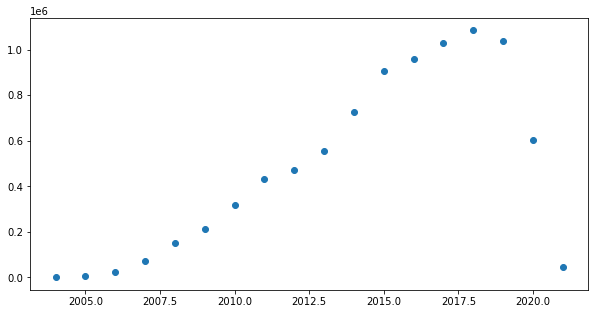

In [18]:
plt.scatter(yearly_all.index, yearly_all.num_reviews)

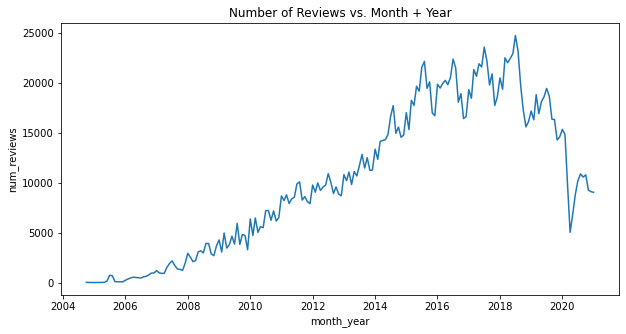

In [19]:
plt.plot(monthly_yearly_df)
plt.xlabel('month_year')
plt.ylabel('num_reviews')
plt.title('Number of Reviews vs. Month + Year')
plt.show()

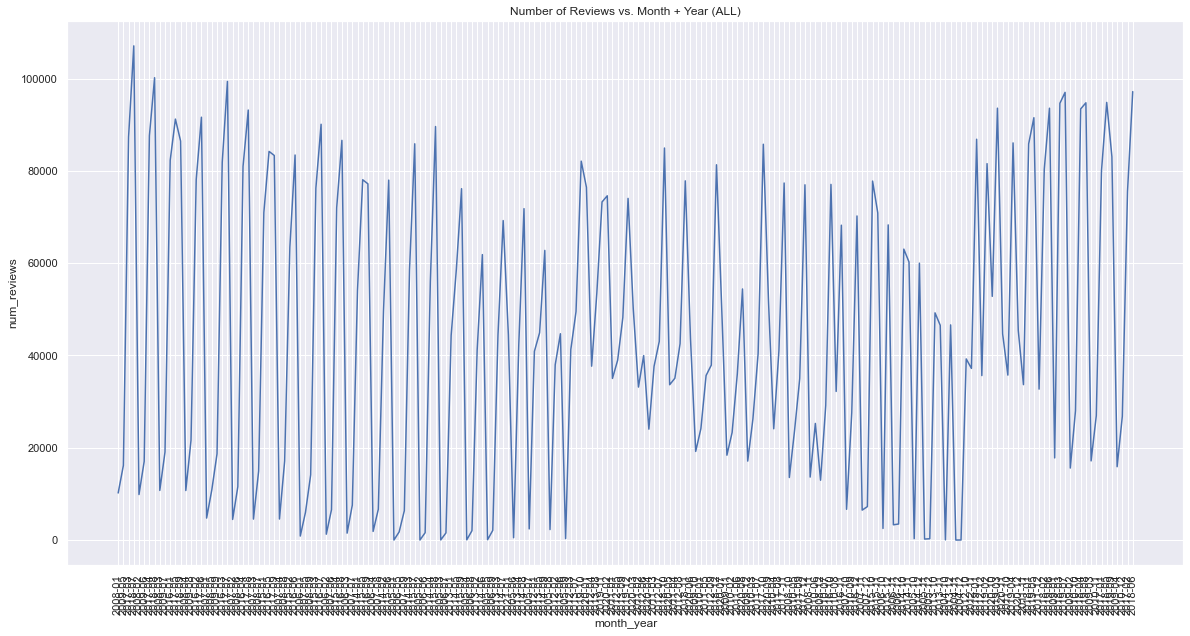

In [61]:
plt.rcParams["figure.figsize"]=(20,10)

monthly_yearly_all = pd.read_csv('monthly_yearly_reviews.csv')
monthly_yearly_all = monthly_yearly_all.rename(columns = {'_c0':'month_year', '_c1':'num_reviews'}).set_index('month_year')

plt.plot(monthly_yearly_all)
plt.xlabel('month_year')
plt.xticks(rotation = 90)
plt.ylabel('num_reviews')
plt.title('Number of Reviews vs. Month + Year (ALL)')
plt.show()

In [62]:
monthly_yearly_all.index = pd.to_datetime(monthly_yearly_all.index, format = '%Y-%m')
monthly_yearly_all = monthly_yearly_all.loc['2004-10':'2019-12']
monthly_yearly_all.index = monthly_yearly_all.index.astype(str)

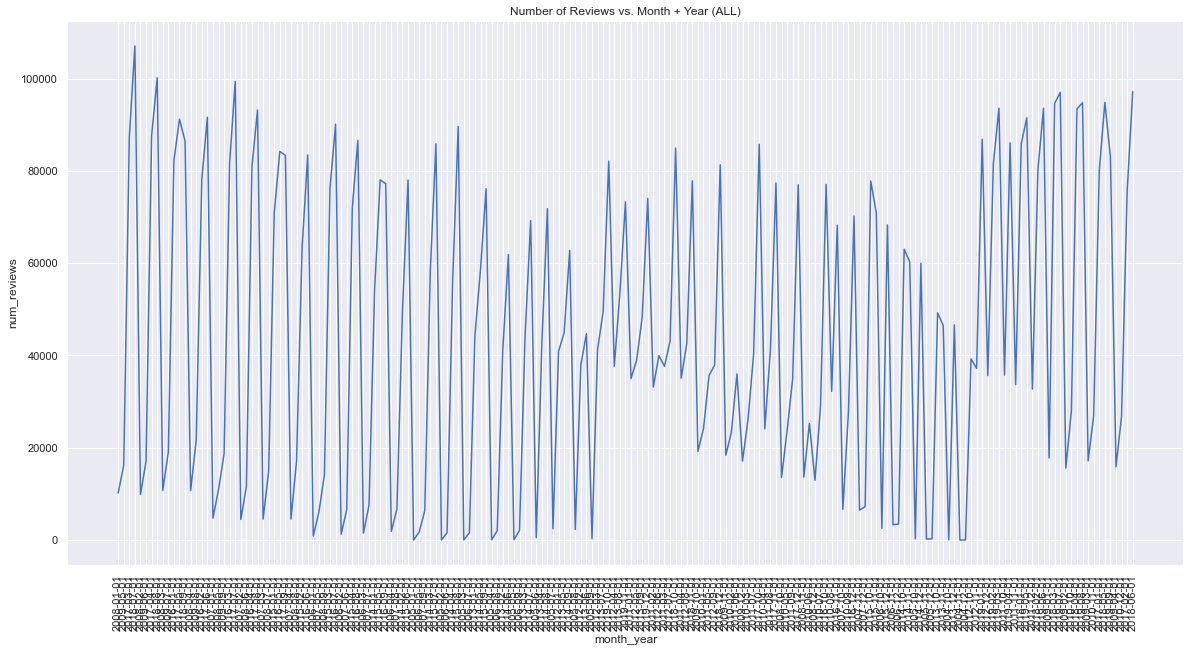

In [70]:
plt.plot(monthly_yearly_all)
plt.xlabel('month_year')
plt.xticks(rotation = 90)
plt.ylabel('num_reviews')
plt.title('Number of Reviews vs. Month + Year (ALL)')
plt.show()

# Time-Series Analysis

**Stationarity** (manner in which time series data changes is constant)

In [63]:
rolling_mean = monthly_yearly_all.rolling(7).mean()
rolling_std = monthly_yearly_all.rolling(7).std()

In [58]:
rolling_mean.sort_index()

,num_reviews
month_year,
2004-10-01,22376.000000
2004-11-01,20423.000000
2004-12-01,20394.428571
2005-01-01,41645.857143
2005-02-01,32939.571429
...,...
2019-08-01,63049.000000
2019-09-01,70041.142857
2019-10-01,36887.428571


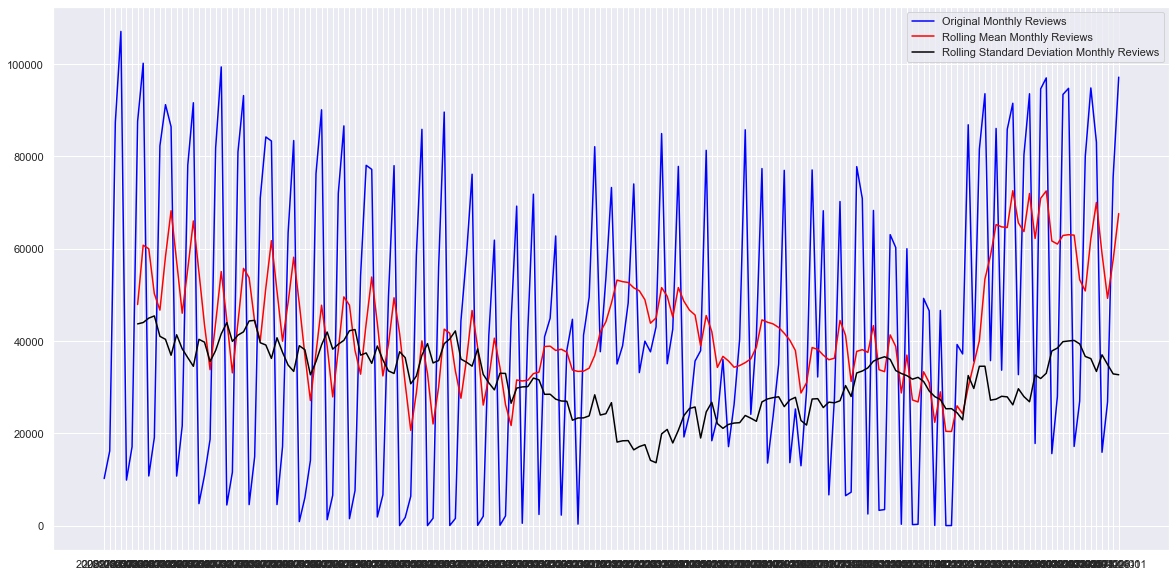

In [64]:
plt.plot(monthly_yearly_all, color = 'blue', label = 'Original Monthly Reviews')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean Monthly Reviews')
plt.plot(rolling_std, color = 'black', label = 'Rolling Standard Deviation Monthly Reviews')
plt.legend()
plt.show()

In [65]:
from statsmodels.tsa.stattools import adfuller

In [66]:
adft = adfuller(monthly_yearly_all,autolag = 'AIC')

output_df = pd.DataFrame({'Values':[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']] , 'Metric':['Test Statistics','p-value','No. of lags used','Number of observations used',
'critical value (1%)', 'critical value (5%)', 'critical value (10%)']})
output_df.set_index('Metric')

,Values
Metric,
Test Statistics,-2.865683
p-value,0.049487
No. of lags used,11.000000
Number of observations used,171.000000
critical value (1%),-3.469181
critical value (5%),-2.878595
critical value (10%),-2.575863


p-value is > any reasonable alpha, so we reject H0: data is stationary

**Autocorrelation** (how correlated time series data is at a given point in time with past values)

In [67]:
ac_lag1 = monthly_yearly_all['num_reviews'].autocorr(lag = 1)
print('One-Month Lag:', ac_lag1)

ac_lag3 = monthly_yearly_all['num_reviews'].autocorr(lag = 3)
print('Three-Month Lag:', ac_lag3)

ac_lag6 = monthly_yearly_all['num_reviews'].autocorr(lag = 6)
print('Six-Month Lag:', ac_lag6)

ac_lag9 = monthly_yearly_all['num_reviews'].autocorr(lag = 9)
print('Nine-Month Lag:', ac_lag9)

One-Month Lag: 0.06300113970473827
Three-Month Lag: 0.00468680755776633
Six-Month Lag: -0.12054686560766917
Nine-Month Lag: 0.47076296140387186


Not very correlated outside of nine months.

**Decomposition**

In [68]:
from statsmodels.tsa.seasonal import seasonal_decompose

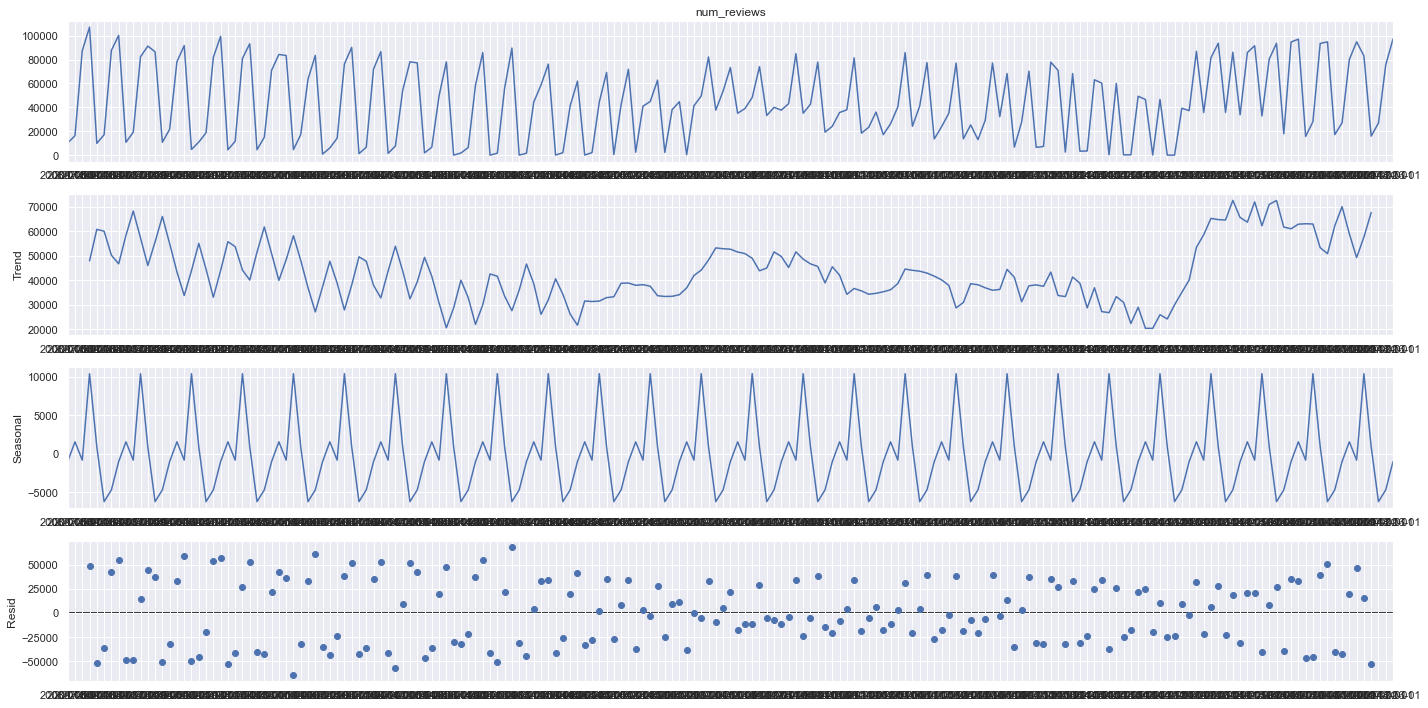

In [69]:
decompose = seasonal_decompose(monthly_yearly_all['num_reviews'], model = 'additive', period = 7)
decompose.plot()
plt.show()

**Forecasting** (ARIMA)

In [71]:
import seaborn as sns

<ipython-input-85-488521a90e34>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['train'] = train['num_reviews']
<ipython-input-85-488521a90e34>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['test'] = test['num_reviews']


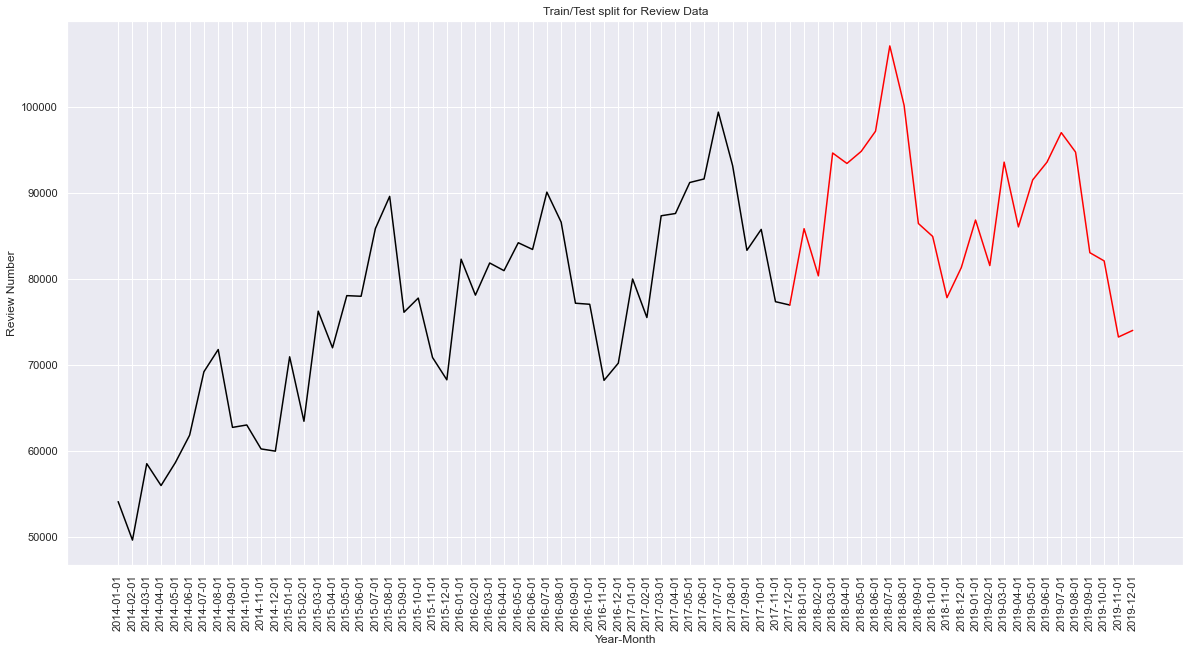

In [85]:
monthly_yearly_all['Date'] = monthly_yearly_all.index
monthly_yearly_all['Date'] = pd.to_datetime(monthly_yearly_all['Date'], format = '%Y-%m')
monthly_yearly_all = monthly_yearly_all.sort_values(by = 'Date')
#train = monthly_yearly_all[monthly_yearly_all['Date'] < pd.to_datetime('2020–01', format = '%Y-%m')]
train = monthly_yearly_all.loc['2014-01':'2018-01']
train['train'] = train['num_reviews']
del train['Date']
del train['num_reviews']
# test = monthly_yearly_all[monthly_yearly_all['Date'] >= pd.to_datetime('2020–01', format = '%Y-%m')]
test = monthly_yearly_all.loc['2017-12':'2021-01']
del test['Date']
test['test'] = test['num_reviews']
del test['num_reviews']
plt.plot(train, color = 'black')
plt.plot(test, color = 'red')
plt.title('Train/Test split for Review Data')
plt.ylabel('Review Number')
plt.xlabel('Year-Month')
plt.xticks(rotation = 90)
sns.set()
plt.show()

In [86]:
from pmdarima.arima import auto_arima

model = auto_arima(train, trace = True, error_action = 'ignore', suppress_warnings = True)
model.fit(train)
forecast = model.predict(n_periods = len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns = ['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=957.865, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=962.531, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=960.770, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=961.670, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=960.804, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=961.773, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=962.613, Time=0.06 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=959.102, Time=0.12 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=959.078, Time=0.19 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=961.798, Time=0.04 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=962.924, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=963.805, Time=0.08 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=959.865, Time=0.23 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=955.917, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=959.8

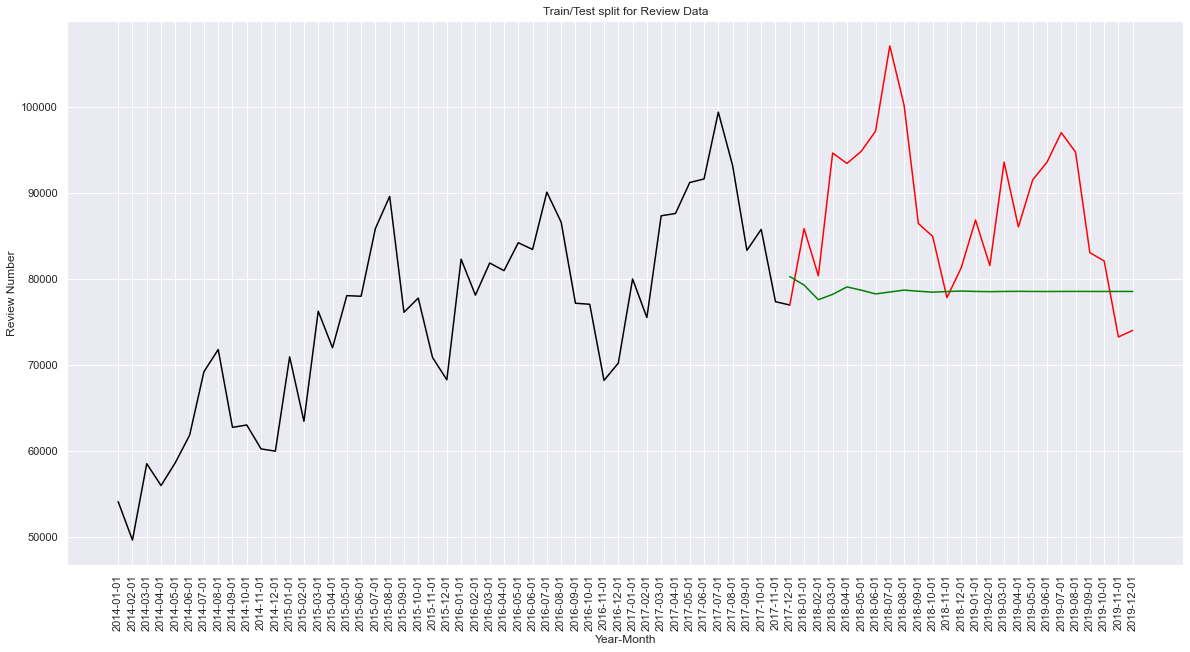

In [87]:
plt.plot(train, color = 'black')
plt.plot(test, color = 'red')
plt.plot(forecast, color = 'green')
plt.title('Train/Test split for Review Data')
plt.ylabel('Review Number')
plt.xlabel('Year-Month')
plt.xticks(rotation = 90)
sns.set()
plt.show()

In [84]:
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(test,forecast))
print('RMSE: ', rms)

RMSE:  8799.403742911745
